In [1]:
import NX5352
import pickle
import os
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

p = NX5352.NX5352()

(array([144078.,      0.,  16026.,      0.,      0.,   2695.,      0.,
           694.,      0.,    398.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

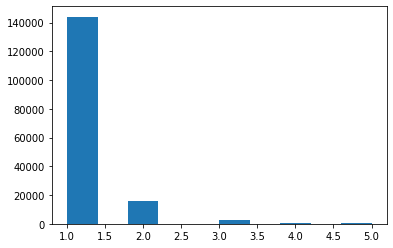

In [2]:
d_u, d_u_count = p.get_domains_per_user()
plt.hist(list(d_u_count.values()))

(array([89056.,     0.,  7135.,     0.,     0., 66945.,     0., 17008.,
            0.,  8837.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

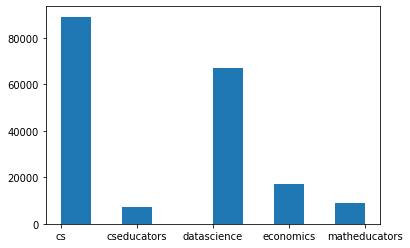

In [3]:
u_d = p.get_users_per_domain()
k, v = list(u_d.keys()), list(u_d.values())
plt.hist(k, weights=v)

In [4]:
u_map = p.get_user_map()
elist, nlist = p.get_user_domain_participation_edgelist(u_map, d_u_count)

In [5]:
elist

[(315381, 'cs', 10),
 (238021, 'cs', 188),
 (18071, 'cs', 26),
 (510259, 'cs', 18),
 (143307, 'cs', 25),
 (376296, 'cs', 7),
 (257842, 'cs', 1138),
 (258390, 'cs', 11),
 (164368, 'cs', 479),
 (377279, 'cs', 3),
 (513706, 'cs', 344),
 (232175, 'cs', 8),
 (484897, 'cs', 6),
 (459207, 'cs', 37),
 (82281, 'cs', 187),
 (406076, 'cs', 49),
 (1278020, 'cs', 2),
 (1018575, 'cs', 1),
 (9383, 'cs', 1),
 (23431, 'cs', 21),
 (287509, 'cs', 18),
 (5663, 'cs', 1),
 (35386, 'cs', 1),
 (61477, 'cs', 1),
 (1273820, 'cs', 33),
 (165349, 'cs', 62),
 (441850, 'cs', 3),
 (162068, 'cs', 17),
 (1159530, 'cs', 390),
 (253560, 'cs', 5),
 (1291795, 'cs', 60),
 (506004, 'cs', 5304),
 (380279, 'cs', 20),
 (1475, 'cs', 2),
 (260880, 'cs', 1),
 (375094, 'cs', 12),
 (10351, 'cs', 1),
 (401553, 'cs', 4),
 (3400, 'cs', 1),
 (341544, 'cs', 2),
 (44529, 'cs', 6),
 (1307915, 'cs', 5),
 (87165, 'cs', 18),
 (44900, 'cs', 5),
 (275164, 'cs', 40),
 (1112921, 'cs', 112),
 (1398563, 'cs', 185),
 (1141589, 'cs', 4),
 (179265, '

In [6]:
G = nx.Graph()
G.add_weighted_edges_from(elist)
nx.write_gml(G, "demograph.gml")

In [7]:
pos = nx.spring_layout(G)

{'cs': Text(0.024342428892850876, 0.20909272134304047, 'cs'),
 'cseducators': Text(-0.2331925481557846, 0.5111179351806641, 'cseducators'),
 'datascience': Text(-0.09262971580028534, -0.3834047317504883, 'datascience'),
 'economics': Text(0.40635159611701965, -0.05380630865693092, 'economics'),
 'matheducators': Text(-0.28850626945495605, 0.1186756044626236, 'matheducators')}

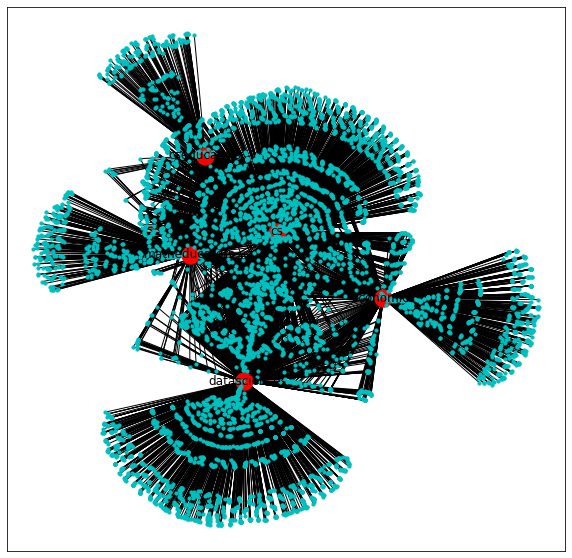

In [8]:
plt.figure(figsize = (10, 10))
nx.draw_networkx_nodes(G, pos = pos, nodelist = nlist[0], node_color = "r")
nx.draw_networkx_nodes(G, pos = pos, nodelist = nlist[1], node_color = "c", node_size = 10)
nx.draw_networkx_edges(G, pos = pos)
nx.draw_networkx_labels(G, pos = pos, labels = {i: i for i in nlist[0]})

In [12]:
nlist[0]

['cs', 'cseducators', 'datascience', 'economics', 'matheducators']